# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 01: Herramientas Computacionales para Ciencia de Datos </center></h1>
    
## 1. Objetivos de la actividad

Esta actividad tiene como objetivo probar el ambiente de programación de cada estudiante, la instalación de librerías de Python. El segundo objetivo es aprender a usar GitHub, a configurar su repositorio, y entregar la actividad.

## 2. Módulos de Python

### 2.1 Importar módulos

Se recomienda comenzar con la importación de módulos o librerías de funciones para distintos usos, o partes de una libreria
para facilitar la referencia a librerías en el resto del código, se acostumbra asignarles un alias. La sintaxis general a usar para importar un módulo es:

``import NOMBRE_MODULO as ALIAS_MODULO``
o
``from NOMBRE_MODULO import FUNCION``

In [98]:
#Importación de librerías: importe las siguientes librerías, usando alias comunes: numpy, pandas, geopandas.
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 3. Ejercicio: Inspección de Datos del Censo 2017
El código a continuación permite descargar, leer, hacer algunos cálculos básicos y visualizar los datos de población del censo chileno de 2017 para la región metropolitana.

In [99]:
#Leer archivo en un DataFrame.
dat=pd.read_csv('Censo2017_Manzanas.csv',delimiter=';')

#Visualizar las primeras lineas.
dat.head()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
0,1,11,1101,1,1,1,1,7849,1101011001001,15,...,0,0,0,0,0,0,1,11,1101,1101011001001
1,1,11,1101,1,1,1,10,7849,1101011001010,70,...,1,0,15,0,0,0,1,11,1101,1101011001010
2,1,11,1101,1,1,1,11,7849,1101011001011,36,...,5,0,15,0,0,0,1,11,1101,1101011001011
3,1,11,1101,1,1,1,12,7849,1101011001012,65,...,9,4,24,0,0,0,1,11,1101,1101011001012
4,1,11,1101,1,1,1,13,7849,1101011001013,39,...,0,0,9,0,0,0,1,11,1101,1101011001013


In [100]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180499 entries, 0 to 180498
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   REGION          180499 non-null  int64 
 1   PROVINCIA       180499 non-null  int64 
 2   COMUNA          180499 non-null  int64 
 3   DC              180499 non-null  int64 
 4   AREA            180499 non-null  int64 
 5   ZC_LOC          180499 non-null  int64 
 6   MZ_ENT          180499 non-null  int64 
 7   ID_ZONA_LOC     180499 non-null  int64 
 8   ID_MANZENT      180499 non-null  int64 
 9   PERSONAS        180499 non-null  int64 
 10  HOMBRES         180499 non-null  object
 11  MUJERES         180499 non-null  object
 12  EDAD_0A5        180499 non-null  object
 13  EDAD_6A14       180499 non-null  object
 14  EDAD_15A64      180499 non-null  object
 15  EDAD_65YMAS     180499 non-null  object
 16  INMIGRANTES     180499 non-null  object
 17  PUEBLO          180499 non-nu

### Pregunta: ¿Cuál era la población total de Chile en 2017?

Para responderla podemos hacer un cálculo sencillo y sumar todos los datos de la columna `PERSONAS`:

In [101]:
#Total de población.
total_pop=dat['PERSONAS'].sum()
print(f'Población total en 2017: {total_pop}')

Población total en 2017: 17574003


También podemos usar algunas funciones más avanzadas de `pandas`para analizar la distribución de personas por región y edad:

In [102]:
#Distribución por edad y género.
cols=['EDAD_0A5','EDAD_6A14','EDAD_15A64','EDAD_65YMAS']
for col in cols:
    dat[col]=dat[col].replace('*',0).astype(float)
    
pv=pd.pivot_table(dat, index='REGION', values=cols, aggfunc='sum', margins=False)
pv

,EDAD_0A5,EDAD_15A64,EDAD_65YMAS,EDAD_6A14
REGION,,,,
1,27089.0,225991.0,22784.0,42860.0
2,40763.0,427746.0,40299.0,70497.0
3,18862.0,188979.0,23711.0,33304.0
4,49130.0,498186.0,77212.0,83390.0
5,110371.0,1212273.0,222900.0,176235.0
6,58426.0,609723.0,96677.0,100364.0
7,62106.0,695161.0,111206.0,108436.0
8,98184.0,1049723.0,164977.0,166678.0
9,57165.0,629746.0,103612.0,99561.0


Y podemos graficar la cantidad por región:

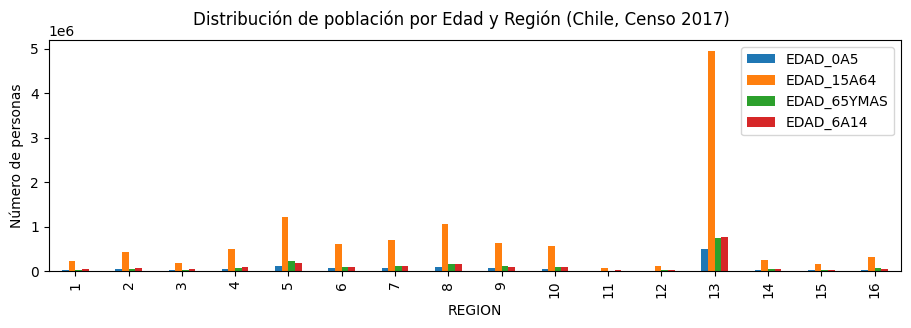

In [103]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
ax.set_ylabel('Número de personas')
fig.suptitle('Distribución de población por Edad y Región (Chile, Censo 2017)')
pv.plot(kind='bar', ax =ax);

## 4. Creación de un Mapa con información del Censo

A continuación usaremos librerías de geopandas para conectar un mapa de la Región Metropolitana con datos del Censo de 2017.

In [104]:
#Leer datos censales.
manz=gpd.read_file('R13/MANZANA_IND_C17.shp')
com=gpd.read_file('R13/COMUNA_C17.shp')

Geopandas permite graficar archivos de mapas de múltiples formas.

<Axes: >

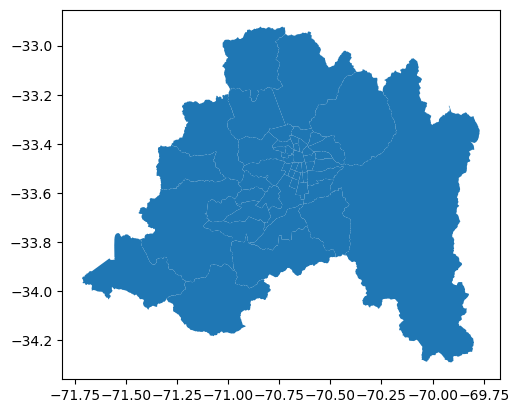

In [105]:
com.plot()

El siguiente código conecta el mapa de la Región Metropolitana con la población por manzana del Censo 2017.

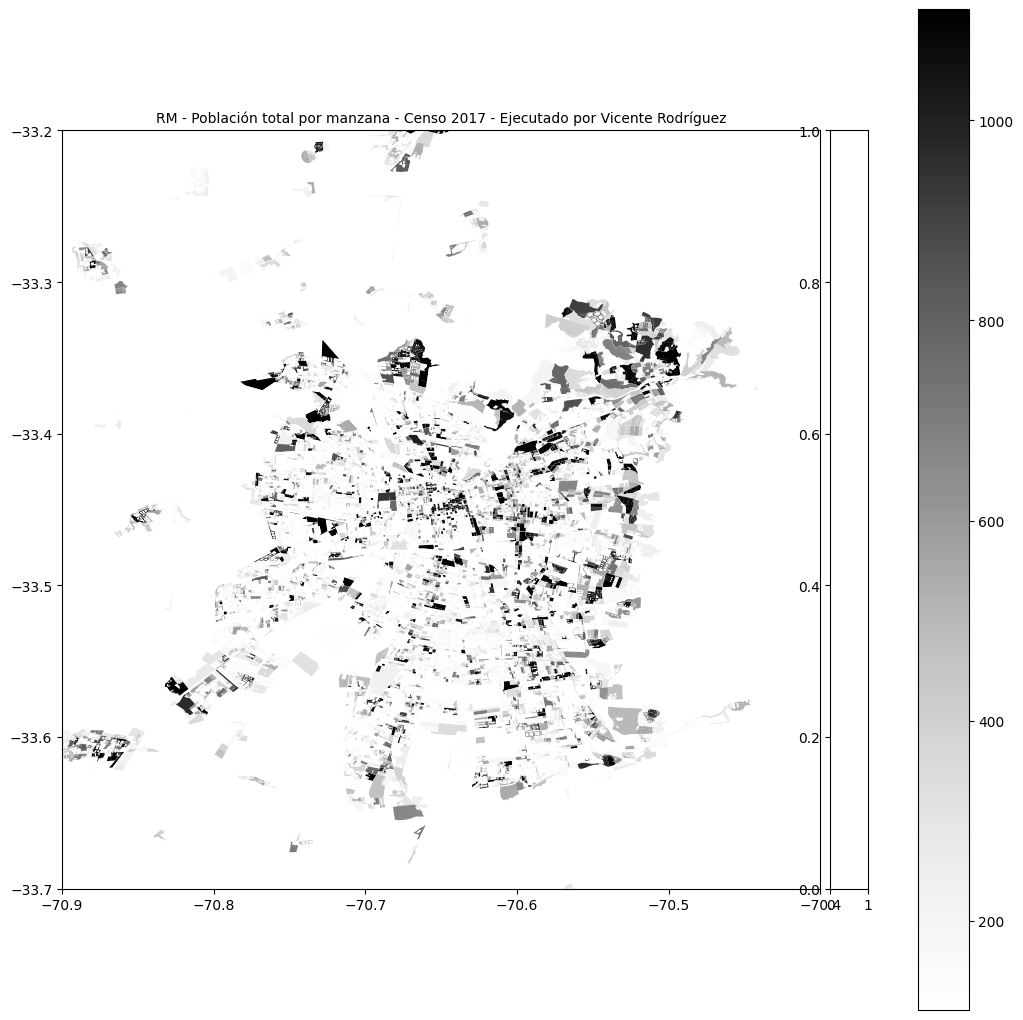

In [106]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

#Crear figura y ejes
fig=plt.figure(figsize=(13,13))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

#Cantidad de personas por manzana
Z=manz['TOTAL_PERS']
manz.plot(ax=ax, column='TOTAL_PERS', cmap='Grays', legend=True, vmin=111, vmax=1111)

com_projected = com.to_crs(epsg=3857)
com_projected.boundary.plot(ax=ax, lw=0.2, color='k')

xlim=[-70.9,-70.4]
ylim=[-33.7,-33.2]
for x, y, label in zip(com_projected.geometry.centroid.x, com_projected.geometry.centroid.y, com_projected.NOM_COMUNA):
    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1]:
        ax.text(x, y, label, fontsize = 10)
        
ax.set_xlim(xlim)
ax.set_ylim(ylim);

ax.set_title('RM - Población total por manzana - Censo 2017 - Ejecutado por Vicente Rodríguez',fontsize=10)

fig.savefig('PoblacionRM_C2017_Vicente Rodríguez.jpg')

## 5. Bonus
- Promedio de personas por manzana en la RM.

In [107]:
#Revisamos manz con el metodo head() que al parecer sirve para ver las filas, revisamos la tabla de datos para tener una idea del rango de valores en la columna 'TOTAL_PERS' sabiendo que manz fue leido anteriormente con geopandas desde el archivo 'R13/MANZANA_IND_C17.shp'.
manz.head(10000000) #Usé un número grande para asegurarme de ver todas las filas ya que al parecer el método head() tiene un límite predeterminado de filas a mostrar.

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,DISTRITO,LOC_ZON,ENT_MAN,CATEGORIA,NOM_CATEGO,MANZENT_I,TOTAL_PERS,TOTAL_VIVI,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,2,1,CD,13101071001002,764,287,0.005560,1.354544e-06,"POLYGON ((-70.67695 -33.42691, -70.67685 -33.4..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,8,1,2,1,CD,13101081001002,1307,509,0.006557,2.630421e-06,"POLYGON ((-70.67362 -33.42898, -70.67517 -33.4..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,3,1,CD,13101071001003,64,17,0.003859,5.979189e-07,"POLYGON ((-70.67812 -33.42803, -70.67813 -33.4..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,4,1,CD,13101071001004,52,21,0.004683,1.265246e-06,"POLYGON ((-70.68043 -33.42897, -70.68046 -33.4..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,7,1,8,1,CD,13101071001008,67,14,0.003491,7.452444e-07,"POLYGON ((-70.67805 -33.42921, -70.67858 -33.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48798,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,3,3,901,1,CD,13121031003901,153,52,0.008099,1.431704e-06,"MULTIPOLYGON (((-70.66713 -33.4949, -70.6671 -..."
48799,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,6,2,16,1,CD,13121061002016,92,24,0.003039,5.410023e-07,"POLYGON ((-70.68446 -33.49291, -70.68502 -33.4..."
48800,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,6,2,901,1,CD,13121061002901,98,19,0.003800,4.939426e-07,"MULTIPOLYGON (((-70.68331 -33.49184, -70.68385..."
48801,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13121,PEDRO AGUIRRE CERDA,6,3,40,1,CD,13121061003040,77,18,0.001643,1.594510e-07,"POLYGON ((-70.68777 -33.49275, -70.68771 -33.4..."


In [108]:
#Calculamos el promedio de personas por manzana con el método mean() de pandas usando la variable Z creada antes en el jupyter notebook y que al parecer contiene la columna 'TOTAL_PERS', la cual contiene el total de personas por manzana y viene del archivo 'R13/MANZANA_IND_C17.shp'.
promedio_personas = Z.mean()
print(f'El promedio es: {promedio_personas:.2f}')

El promedio es: 139.82
